In [11]:
names = ['power', 'procentage', 'Q_mean', 'W_mean',
 'freq_pair_no', 'nu1', 'nu2',
 'tb_mean_nu1', 'tb_mean_nu2',
 'tau_mean_nu1', 'tau_mean_nu2',
 'Qr_mean', 'Wr_mean', 'Qrs', 'Wrs',
]

In [12]:
n = {}
for key, value in enumerate(names):
    n[value] = key

In [13]:
# import dill
# with open('pre_data.bin', 'rb') as dump:
#     data = dill.load(dump)

In [14]:
# import dill
# with open('pre_data_old_kw_t-2.bin', 'rb') as dump:
#     data = dill.load(dump)

In [15]:
import dill
with open('pre_data_new_kw_t0.bin', 'rb') as dump:
    data = dill.load(dump)

In [16]:
data.shape

(3001, 15)

In [17]:
import numpy as np
data = np.array(data[1:, :]).astype(float)

In [18]:
power = np.unique(data[:, n['power']])
power

array([0.        , 0.12820513, 0.25641026, 0.38461538, 0.51282051,
       0.64102564, 0.76923077, 0.8974359 , 1.02564103, 1.15384615,
       1.28205128, 1.41025641, 1.53846154, 1.66666667, 1.79487179,
       1.92307692, 2.05128205, 2.17948718, 2.30769231, 2.43589744,
       2.56410256, 2.69230769, 2.82051282, 2.94871795, 3.07692308,
       3.20512821, 3.33333333, 3.46153846, 3.58974359, 3.71794872,
       3.84615385, 3.97435897, 4.1025641 , 4.23076923, 4.35897436,
       4.48717949, 4.61538462, 4.74358974, 4.87179487, 5.        ])

In [19]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

In [20]:
np.unique(data[:, n['procentage']])

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

<IPython.core.display.Javascript object>


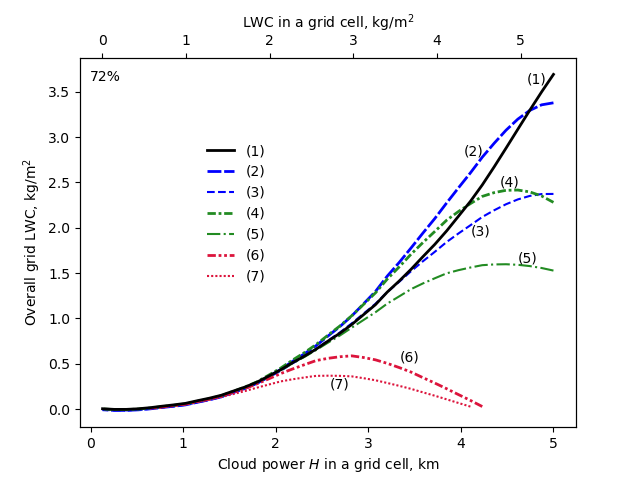

In [22]:
from scipy.signal import savgol_filter

plt.figure()

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

proc = 72

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

smoothness = 11

plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
         color='black', 
         linestyle='-', zorder=99, linewidth=2,
         label='(1)')
#         label='(1) True overall grid mean LWC')
plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2,
         label='(2)')
#         label='(2) LWC retrieved from BT maps, then averaged')
plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')
#         label='(3) LWC retrieved from mean values of BT')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'],  linewidth=2,
         label='(4)')
plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle='-.',  linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
W_mean = data[cond, n['W_mean']]
Wr_mean = data[cond, n['Wr_mean']]
Wrs = data[cond, n['Wrs']]

plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2,
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'], label='(6)')
plt.plot(power, np.where(Wrs > 0, savgol_filter(Wrs, smoothness, 3), None),  linewidth=1.5,
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dotted'], label='(7)')

plt.xlabel('Cloud power $H$ in a grid cell, km')
plt.ylabel('Overall grid LWC, kg/m$^2$')

plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.23, 0., 0.5, 0.8))

ax = plt.gca()
ax2 = ax.twiny()
ax2.plot(_c0 * np.power(power, _c1), 
         savgol_filter(W_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
ax2.set_xlabel('LWC in a grid cell, kg/m$^2$')

plt.text(5.065, 3.59, '(1)')
plt.text(4.315, 2.8, '(2)')
plt.text(4.4, 1.91, '(3)')
plt.text(4.75, 2.45, '(4)')
plt.text(4.96, 1.62, '(5)')
plt.text(3.55, 0.52, '(6)')
plt.text(2.715, 0.225, '(7)')
plt.text(-0.15, 3.62, '72%')

# plt.set_gray(True)
plt.savefig('fig/pre_fig01.eps')
plt.savefig('fig/pre_fig01.png', dpi=300)

<IPython.core.display.Javascript object>


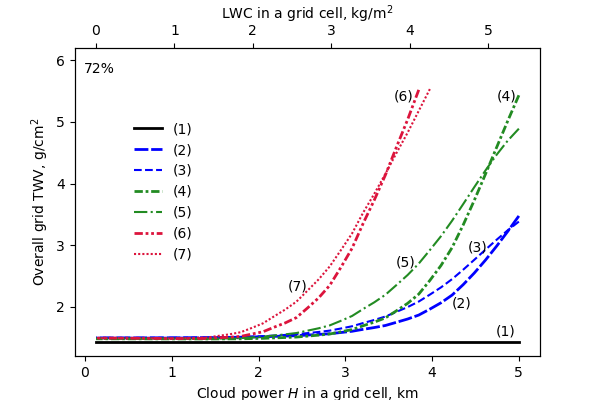

In [23]:
from scipy.signal import savgol_filter

plt.figure(figsize=(6, 4))

proc = 72

_c0 = 0.132574
_c1 = 2.30215

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

smoothness = 11

plt.plot(power, Q_mean, color='black', linestyle='-', 
         linewidth=2, label='(1)', zorder=99)
plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle=linestyles['densely dashed'], linewidth=2.,
         label='(2)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='dimgray', 
         color='blue',
         linestyle='--', linewidth=1.5,
         label='(3)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle=linestyles['densely dashdotted'], linewidth=2.,
         label='(4)')
plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
#          color='darkgray', 
         color='forestgreen',
         linestyle='-.', linewidth=1.5,
         label='(5)')

cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
power = data[cond, n['power']]
Q_mean = data[cond, n['Q_mean']]
Qr_mean = data[cond, n['Qr_mean']]
Qrs = data[cond, n['Qrs']]

plt.plot(power, np.where(Qr_mean < 6, savgol_filter(Qr_mean, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dashdotdotted'],  linewidth=2.,
         label='(6)')
plt.plot(power, np.where(Qrs < 6, savgol_filter(Qrs, smoothness, 3), None), 
#          color='gray', 
         color='crimson',
         linestyle=linestyles['densely dotted'], linewidth=1.5,
         label='(7)')

plt.xlabel('Cloud power $H$ in a grid cell, km')
plt.ylabel('Overall grid TWV, g/cm$^2$')

plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.1, 0., 0.5, 0.8))

plt.ylim(1, 10.5)
plt.ylim(1.2, 6.2)

ax = plt.gca()
ax2 = ax.twiny()
ax2.plot(_c0 * np.power(power, _c1), 
         savgol_filter(Q_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
ax2.set_xlabel('LWC in a grid cell, kg/m$^2$')

plt.text(5.1, 1.54, '(1)')
plt.text(4.53, 1.99, '(2)')
plt.text(4.735, 2.9, '(3)')
plt.text(5.11, 5.35, '(4)')
plt.text(3.82, 2.66, '(5)')
plt.text(3.8, 5.35, '(6)')
plt.text(2.45, 2.26, '(7)')
plt.text(-0.15, 5.8, '72%')

plt.savefig('fig/pre_fig02.eps')
plt.savefig('fig/pre_fig02.png', dpi=300)

In [24]:
np.unique(data[:, n['procentage']])

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100.])

<IPython.core.display.Javascript object>


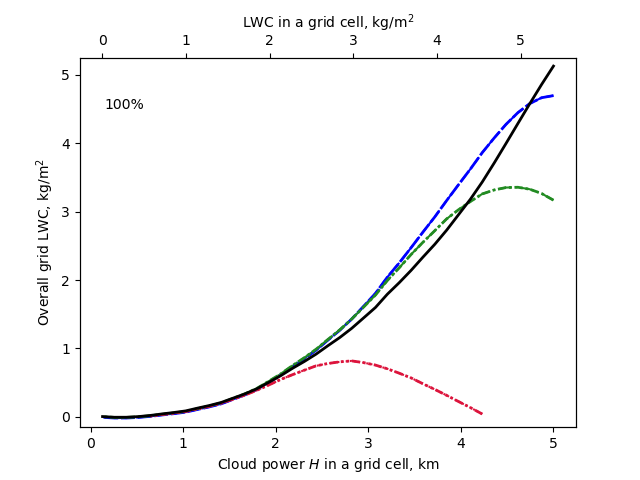

<IPython.core.display.Javascript object>


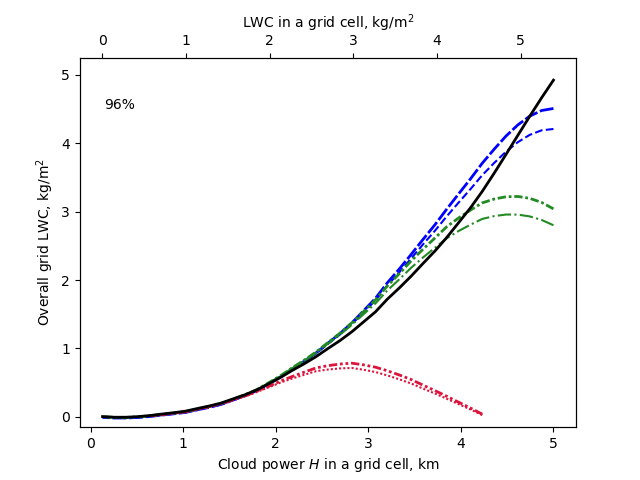

<IPython.core.display.Javascript object>


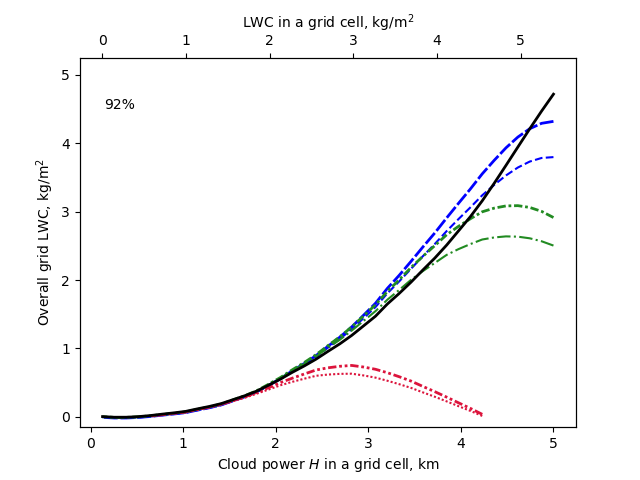

<IPython.core.display.Javascript object>


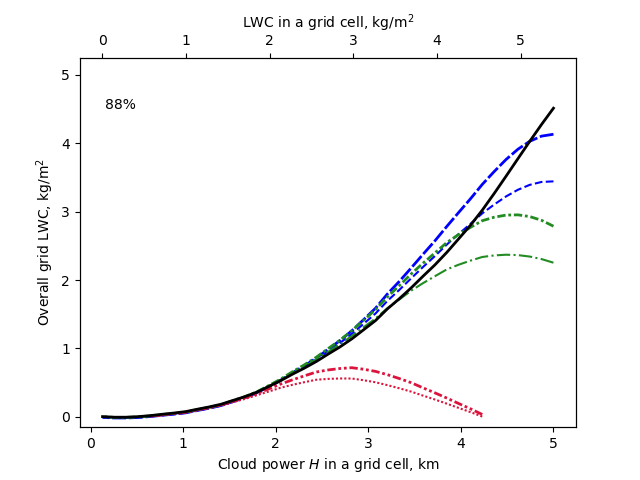

<IPython.core.display.Javascript object>


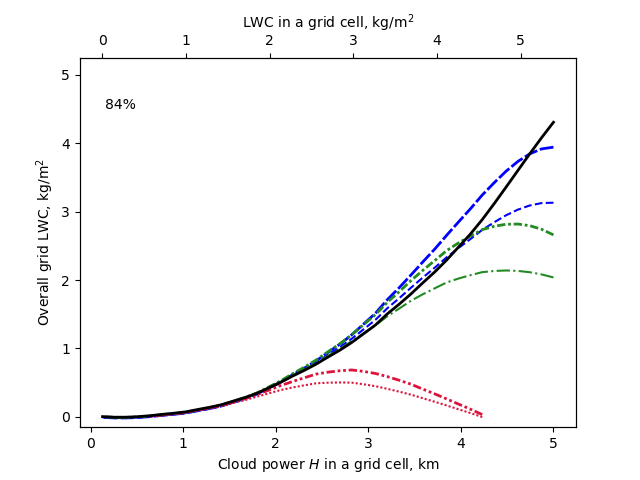

<IPython.core.display.Javascript object>


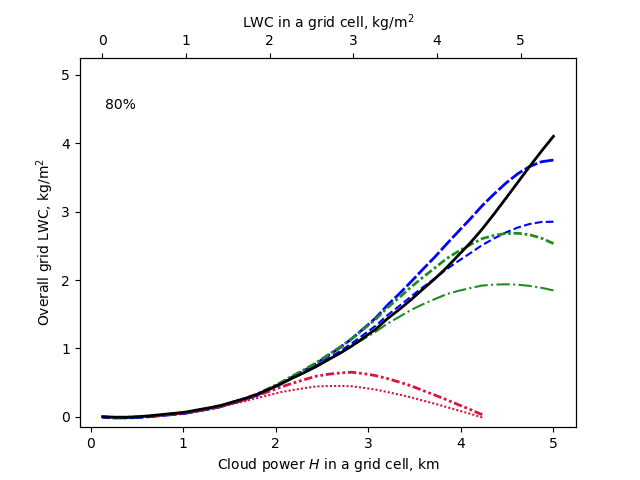

<IPython.core.display.Javascript object>


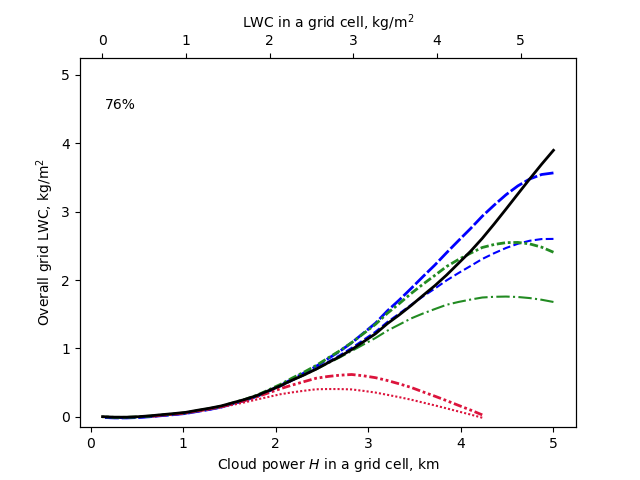

<IPython.core.display.Javascript object>


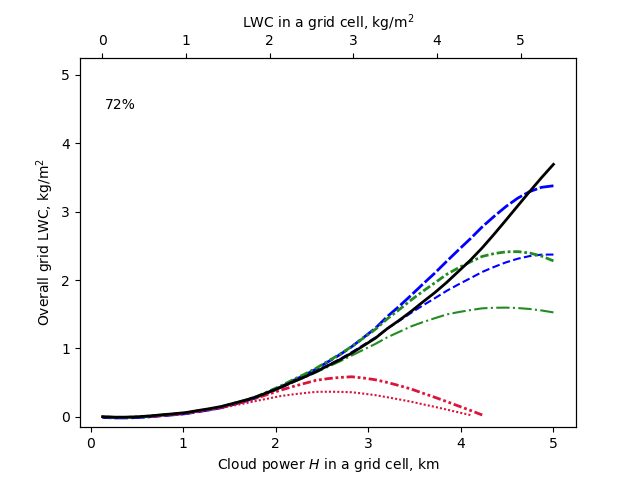

<IPython.core.display.Javascript object>


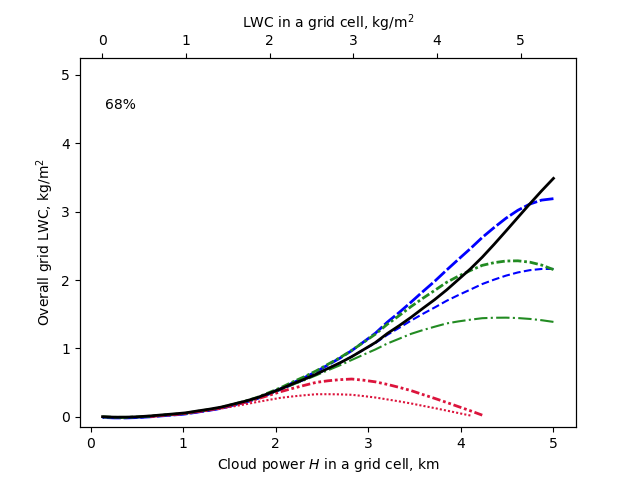

<IPython.core.display.Javascript object>


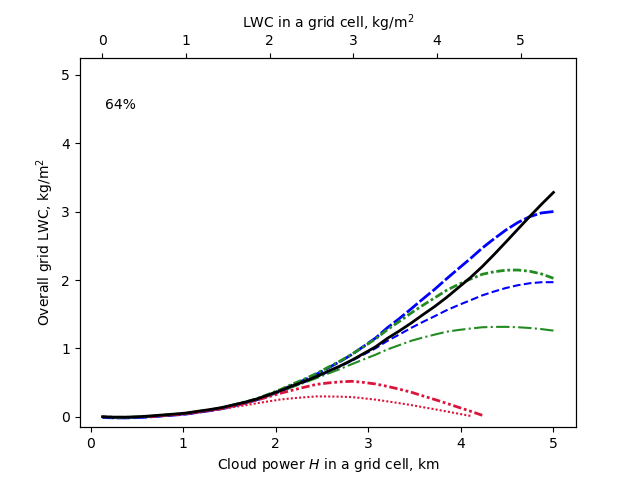

<IPython.core.display.Javascript object>


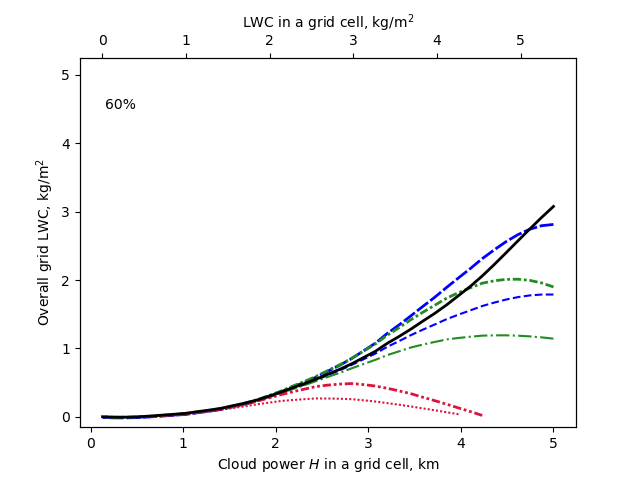

<IPython.core.display.Javascript object>


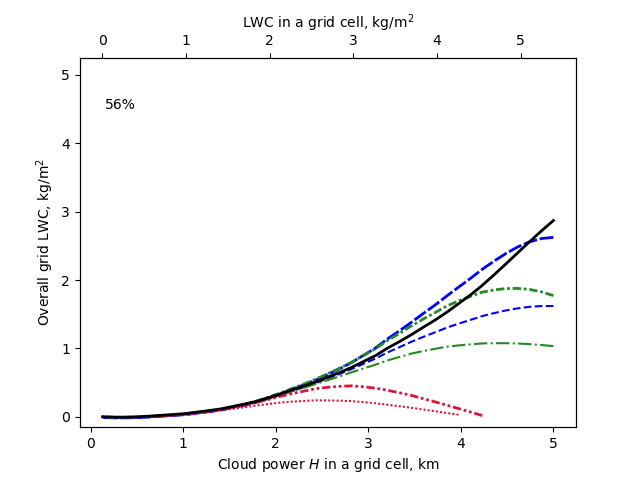

<IPython.core.display.Javascript object>


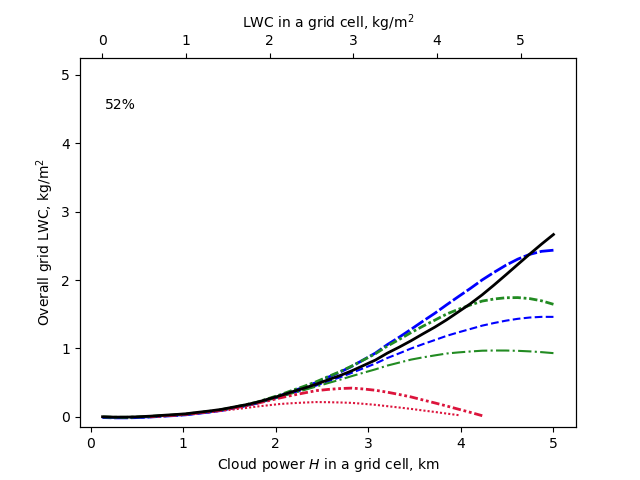

<IPython.core.display.Javascript object>


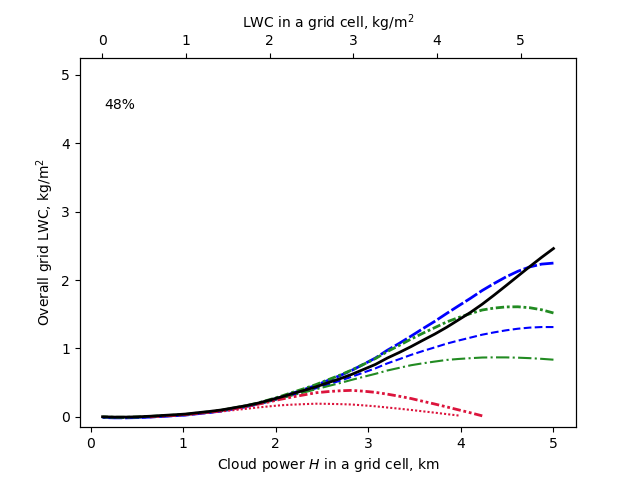

<IPython.core.display.Javascript object>


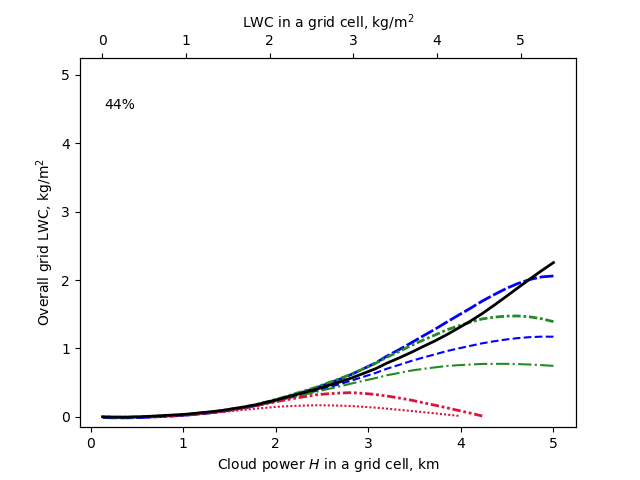

<IPython.core.display.Javascript object>


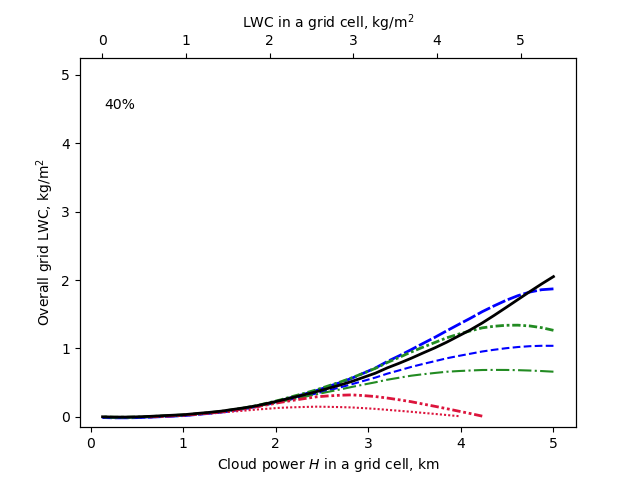

<IPython.core.display.Javascript object>


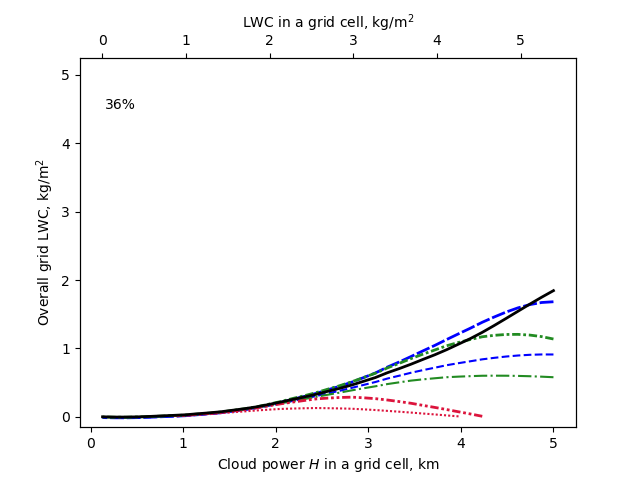

<IPython.core.display.Javascript object>


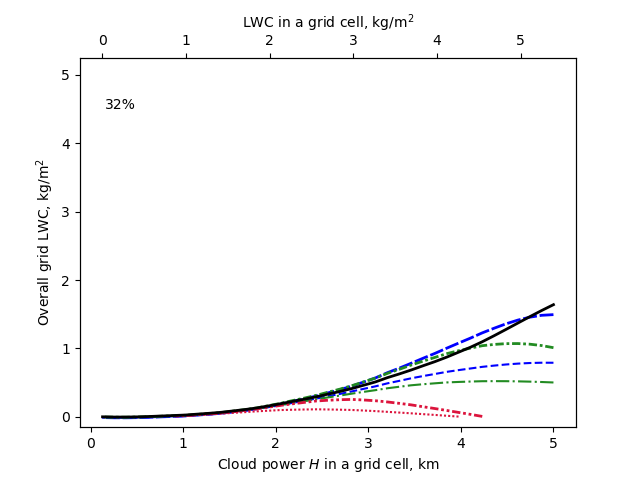

<IPython.core.display.Javascript object>


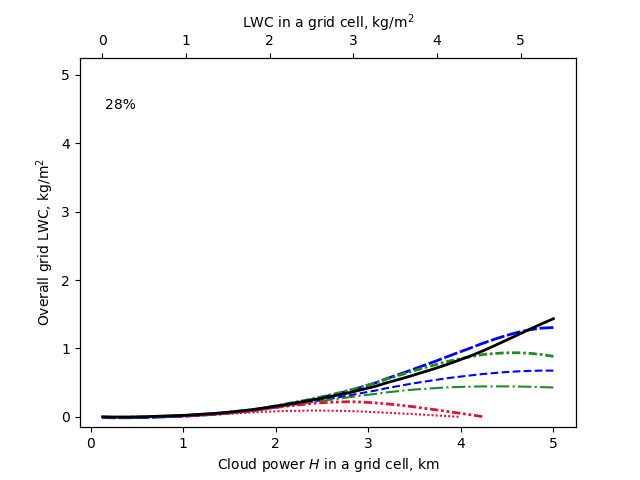

<IPython.core.display.Javascript object>


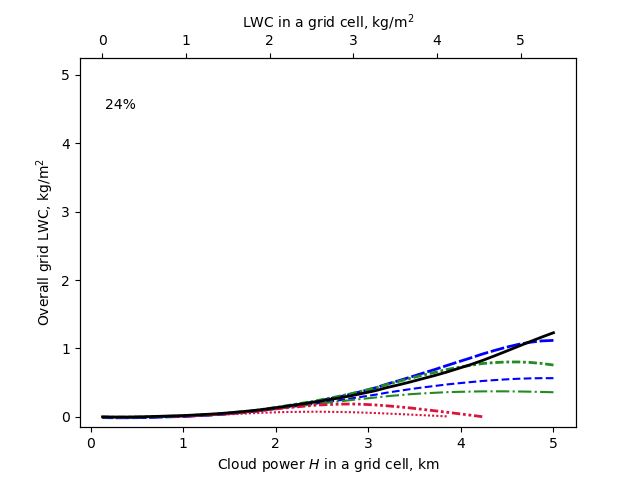

<IPython.core.display.Javascript object>


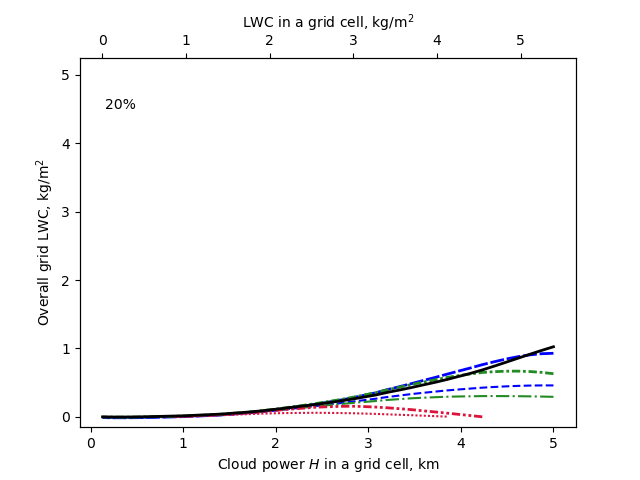

In [29]:
from scipy.signal import savgol_filter

linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

k = 0
for i, proc in enumerate(np.unique(data[:, n['procentage']])[::-1]):
    if proc < 20:
        continue
        
    k += 1
    
    plt.figure()

    _c0 = 0.132574
    _c1 = 2.30215

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
    power = data[cond, n['power']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]

    smoothness = 11

    plt.plot(power, savgol_filter(W_mean, smoothness, 3), 
             color='black', 
             linestyle='-', zorder=99, linewidth=2,
             label='(1)')
    #         label='(1) True overall grid mean LWC')
    plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle=linestyles['densely dashed'], linewidth=2,
             label='(2)')
    #         label='(2) LWC retrieved from BT maps, then averaged')
    plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle='--', linewidth=1.5,
             label='(3)')
    #         label='(3) LWC retrieved from mean values of BT')
    
#     plt.text(0.15, np.max(savgol_filter(Wr_mean, smoothness, 3)), '{:.0f}%'.format(proc))
    plt.text(0.15, 4.5, '{:.0f}%'.format(proc))

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
    power = data[cond, n['power']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]

    plt.plot(power, savgol_filter(Wr_mean, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle=linestyles['densely dashdotted'],  linewidth=2,
             label='(4)')
    plt.plot(power, savgol_filter(Wrs, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle='-.',  linewidth=1.5,
             label='(5)')

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
    power = data[cond, n['power']]
    W_mean = data[cond, n['W_mean']]
    Wr_mean = data[cond, n['Wr_mean']]
    Wrs = data[cond, n['Wrs']]

    plt.plot(power, np.where(Wr_mean > 0, savgol_filter(Wr_mean, smoothness, 3), None),  linewidth=2,
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dashdotdotted'], label='(6)')
    plt.plot(power, np.where(Wrs > 0, savgol_filter(Wrs, smoothness, 3), None),  linewidth=1.5,
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dotted'], label='(7)')

    plt.xlabel('Cloud power $H$ in a grid cell, km')
    plt.ylabel('Overall grid LWC, kg/m$^2$')

#     plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.23, 0., 0.5, 0.8))

    plt.ylim((-0.15, 5.25))

    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.plot(_c0 * np.power(power, _c1), 
             savgol_filter(W_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
    ax2.set_xlabel('LWC in a grid cell, kg/m$^2$')

    # plt.text(5.065, 3.59, '(1)')
    # plt.text(4.315, 2.8, '(2)')
    # plt.text(4.4, 1.91, '(3)')
    # plt.text(4.75, 2.45, '(4)')
    # plt.text(4.96, 1.62, '(5)')
    # plt.text(3.55, 0.52, '(6)')
    # plt.text(2.715, 0.225, '(7)')

    # plt.set_gray(True)
    import os
    save_dir = os.path.join('fig', 'pre', 'LWC')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plt.savefig(os.path.join(save_dir, '{}.png'.format(str(k).zfill(2))), dpi=300)

<IPython.core.display.Javascript object>


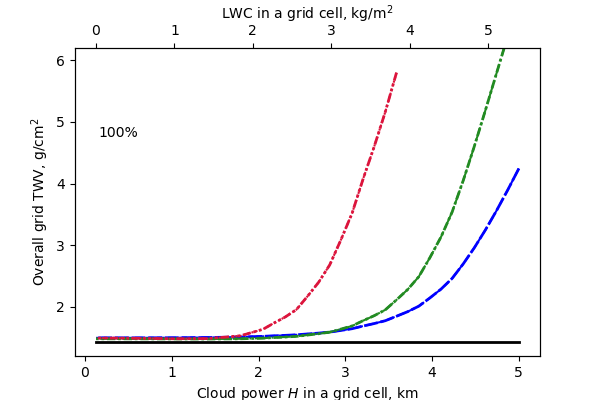

<IPython.core.display.Javascript object>


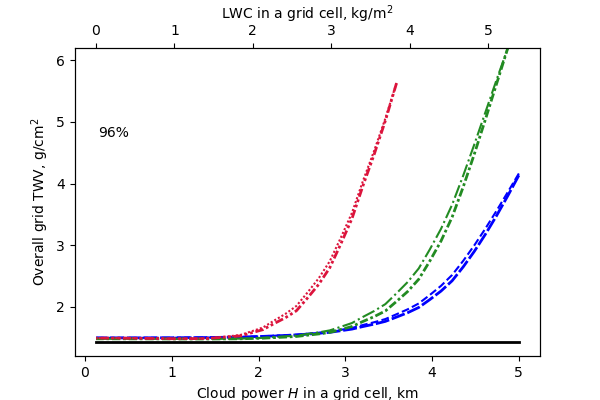

<IPython.core.display.Javascript object>


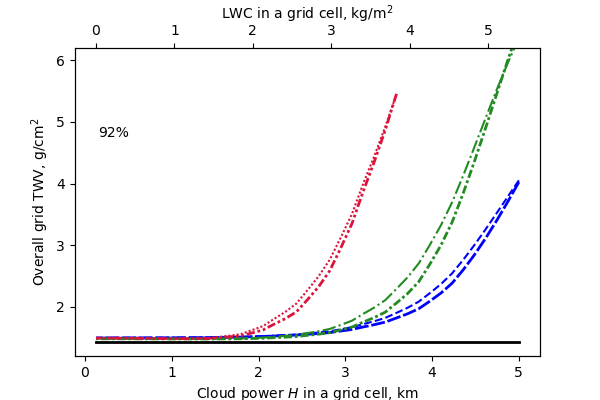

<IPython.core.display.Javascript object>


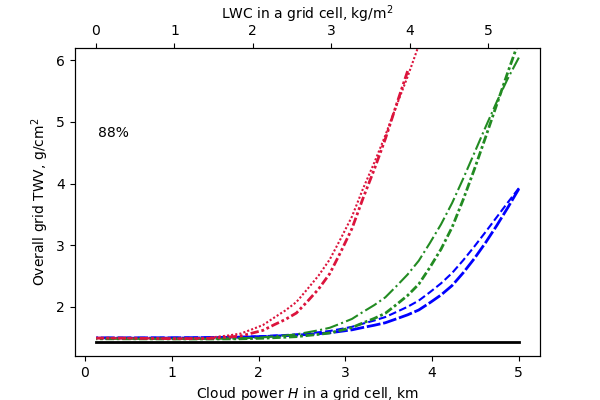

<IPython.core.display.Javascript object>


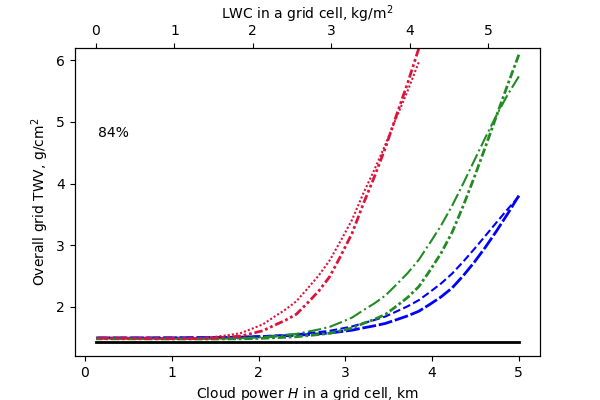

<IPython.core.display.Javascript object>


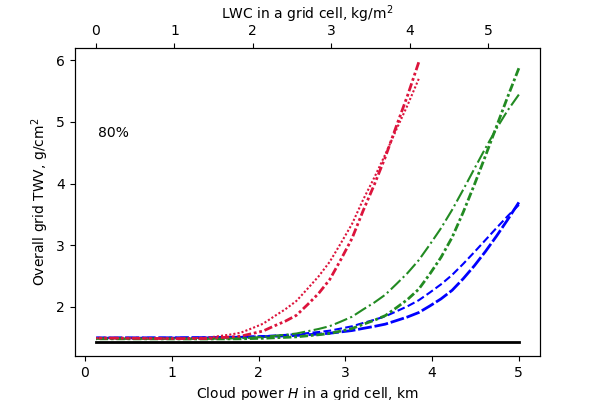

<IPython.core.display.Javascript object>


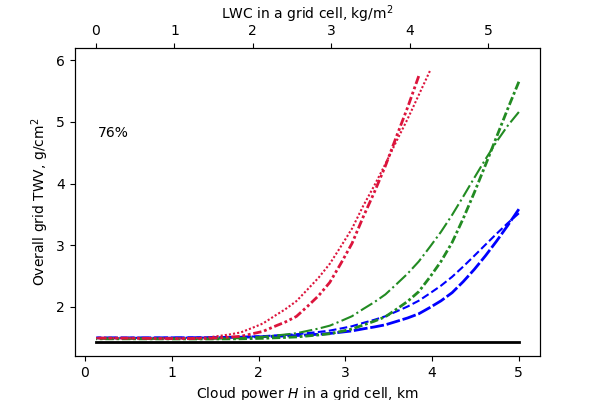

<IPython.core.display.Javascript object>


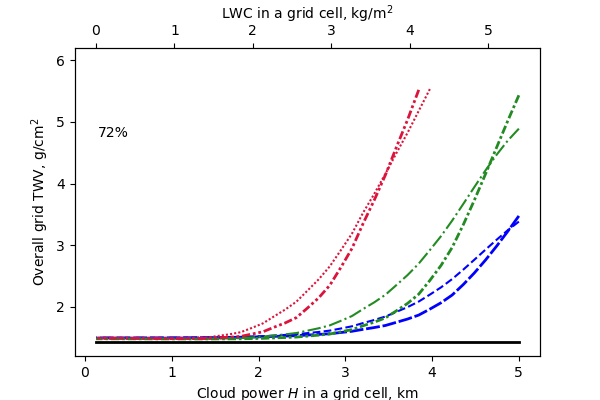

<IPython.core.display.Javascript object>


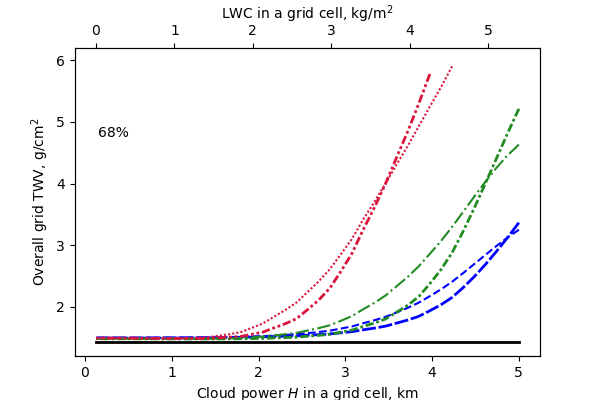

<IPython.core.display.Javascript object>


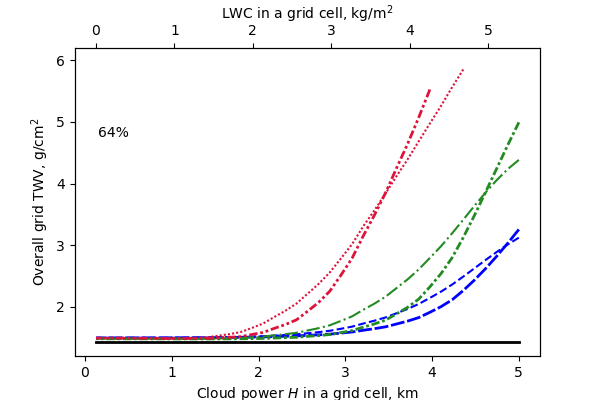

<IPython.core.display.Javascript object>


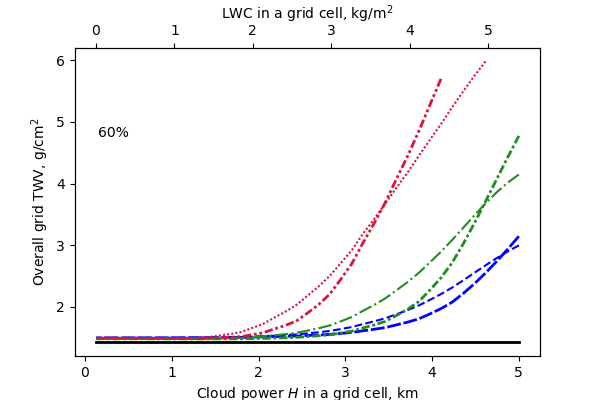

<IPython.core.display.Javascript object>


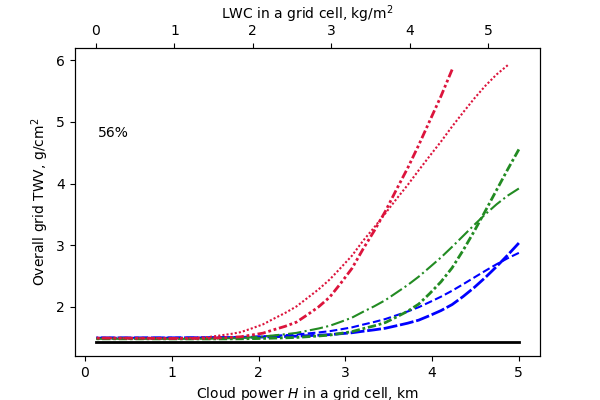

<IPython.core.display.Javascript object>


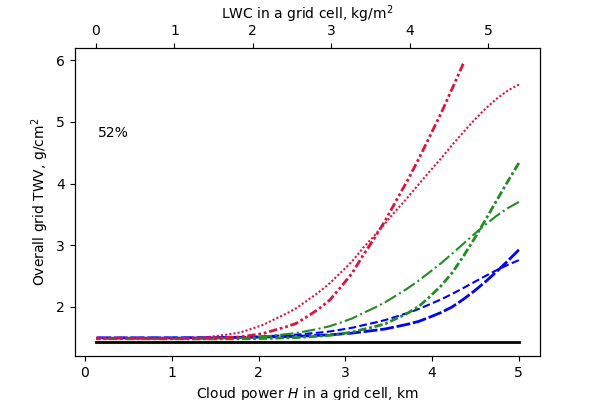

<IPython.core.display.Javascript object>


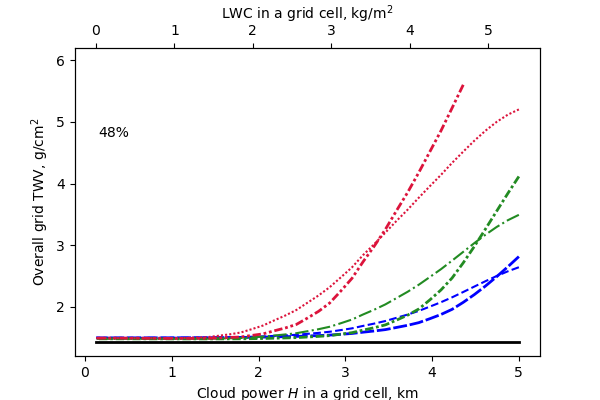

<IPython.core.display.Javascript object>


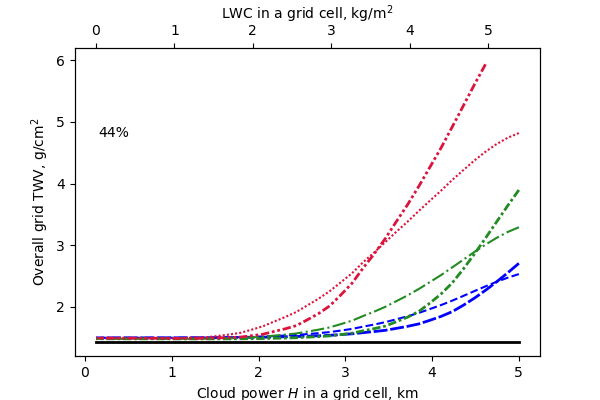

<IPython.core.display.Javascript object>


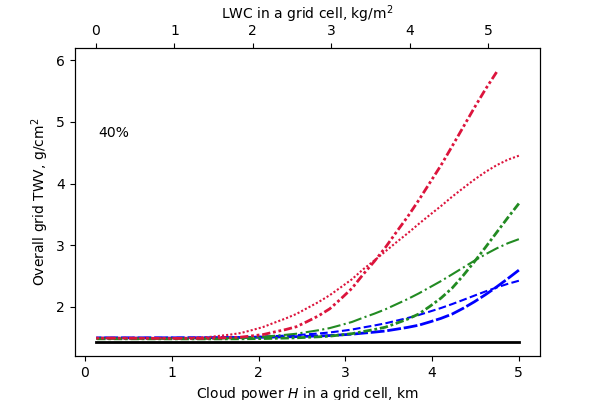

<IPython.core.display.Javascript object>


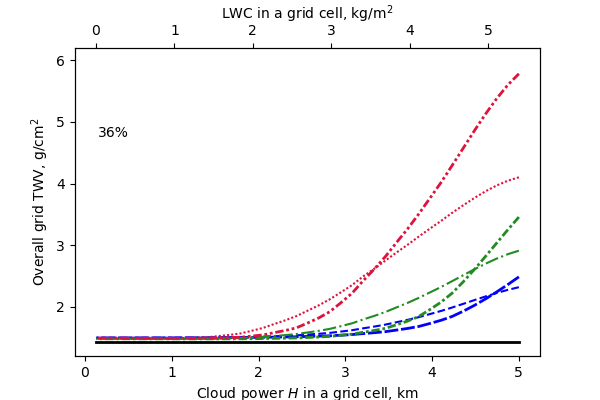

<IPython.core.display.Javascript object>


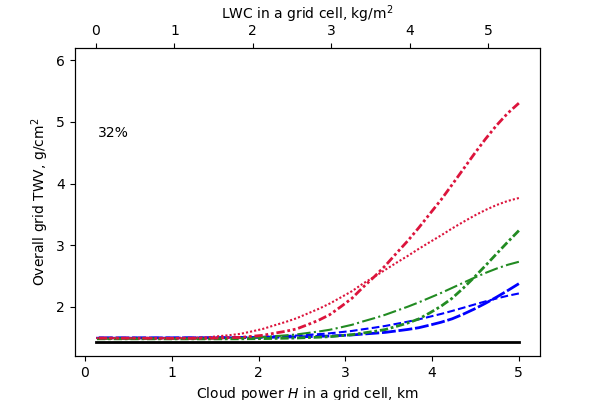

<IPython.core.display.Javascript object>


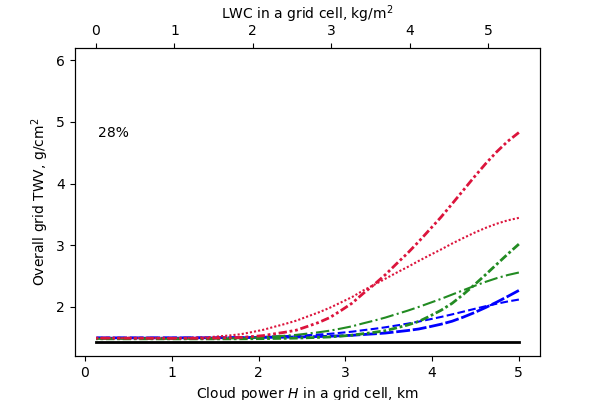

<IPython.core.display.Javascript object>


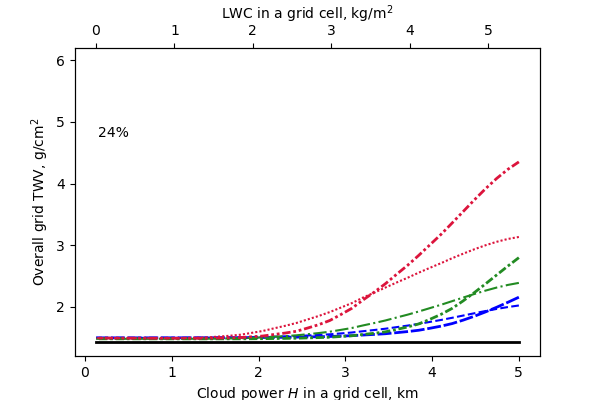

<IPython.core.display.Javascript object>


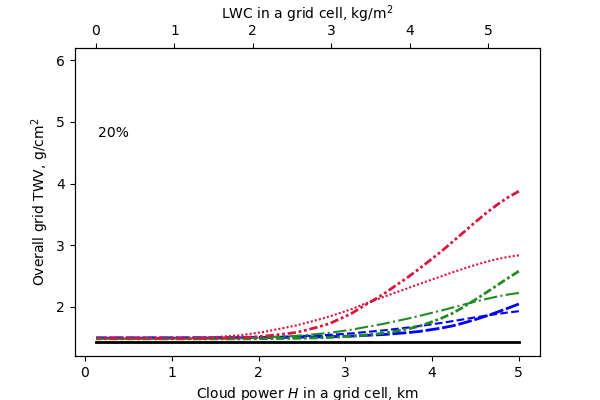

In [30]:
from scipy.signal import savgol_filter

k = 0
for i, proc in enumerate(np.unique(data[:, n['procentage']])[::-1]):
    if proc < 20:
        continue
        
    k += 1
    
    plt.figure(figsize=(6, 4))

    _c0 = 0.132574
    _c1 = 2.30215

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 0)
    power = data[cond, n['power']]
    Q_mean = data[cond, n['Q_mean']]
    Qr_mean = data[cond, n['Qr_mean']]
    Qrs = data[cond, n['Qrs']]

    smoothness = 11

    plt.plot(power, Q_mean, color='black', linestyle='-', 
             linewidth=2, label='(1)', zorder=99)
    plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle=linestyles['densely dashed'], linewidth=2.,
             label='(2)')
    plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
    #          color='dimgray', 
             color='blue',
             linestyle='--', linewidth=1.5,
             label='(3)')
    
    plt.text(0.15, 4.75, '{:.0f}%'.format(proc))

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 1)
    power = data[cond, n['power']]
    Q_mean = data[cond, n['Q_mean']]
    Qr_mean = data[cond, n['Qr_mean']]
    Qrs = data[cond, n['Qrs']]

    plt.plot(power, savgol_filter(Qr_mean, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle=linestyles['densely dashdotted'], linewidth=2.,
             label='(4)')
    plt.plot(power, savgol_filter(Qrs, smoothness, 3), 
    #          color='darkgray', 
             color='forestgreen',
             linestyle='-.', linewidth=1.5,
             label='(5)')

    cond = np.isclose(data[:, n['procentage']], proc) & (data[:, n['freq_pair_no']] == 2)
    power = data[cond, n['power']]
    Q_mean = data[cond, n['Q_mean']]
    Qr_mean = data[cond, n['Qr_mean']]
    Qrs = data[cond, n['Qrs']]

    plt.plot(power, np.where(Qr_mean < 6, savgol_filter(Qr_mean, smoothness, 3), None), 
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dashdotdotted'],  linewidth=2.,
             label='(6)')
    plt.plot(power, np.where(Qrs < 6, savgol_filter(Qrs, smoothness, 3), None), 
    #          color='gray', 
             color='crimson',
             linestyle=linestyles['densely dotted'], linewidth=1.5,
             label='(7)')

    plt.xlabel('Cloud power $H$ in a grid cell, km')
    plt.ylabel('Overall grid TWV, g/cm$^2$')

#     plt.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.1, 0., 0.5, 0.8))

    plt.ylim(1, 10.5)
    plt.ylim(1.2, 6.2)

    ax = plt.gca()
    ax2 = ax.twiny()
    ax2.plot(_c0 * np.power(power, _c1), 
             savgol_filter(Q_mean, smoothness, 3), color='white', linestyle='-', alpha=0.)
    ax2.set_xlabel('LWC in a grid cell, kg/m$^2$')

    # plt.text(5.1, 1.54, '(1)')
    # plt.text(4.53, 1.99, '(2)')
    # plt.text(4.735, 2.9, '(3)')
    # plt.text(5.11, 5.35, '(4)')
    # plt.text(3.82, 2.66, '(5)')
    # plt.text(3.8, 5.35, '(6)')
    # plt.text(2.45, 2.26, '(7)')

    import os
    save_dir = os.path.join('fig', 'pre', 'TWV')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plt.savefig(os.path.join(save_dir, '{}.png'.format(str(k).zfill(2))), dpi=300)